In [1]:
import torch
from torchsummary import summary
from modules.data_preprocessing import get_data
from modules.figure_generation import (
                                train_imshow, 
                                test_imshow, 
                                train_test_loss_function, 
                                train_test_accuracy, 
                                model_classification_report, 
                                confusion_matrix_results, 
)
from modules.model_training import training_the_model, model, criterion
from modules.model_results import model_predictions
from tests.model_testing import annotated_predictions

USING GPU


In [2]:
# For reproducible results

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

In [3]:
# Load the preprocessed train and test datasets
train, test = get_data()
len(train), len(test)

(4, 28)

In [4]:
# Classes of traffic road signs being analyzed
classes = ('animal-crossing','bump','bicycle-lane',
           'construction','divided-highway-begins','handicap',
           'keep-right','no-entry','no-parking-either-side',
           'no-u-turn','pedestrian-crossing','people-working',
           'playground-zone','railway-crossing',
           'speed-limit-80','stop','yield')

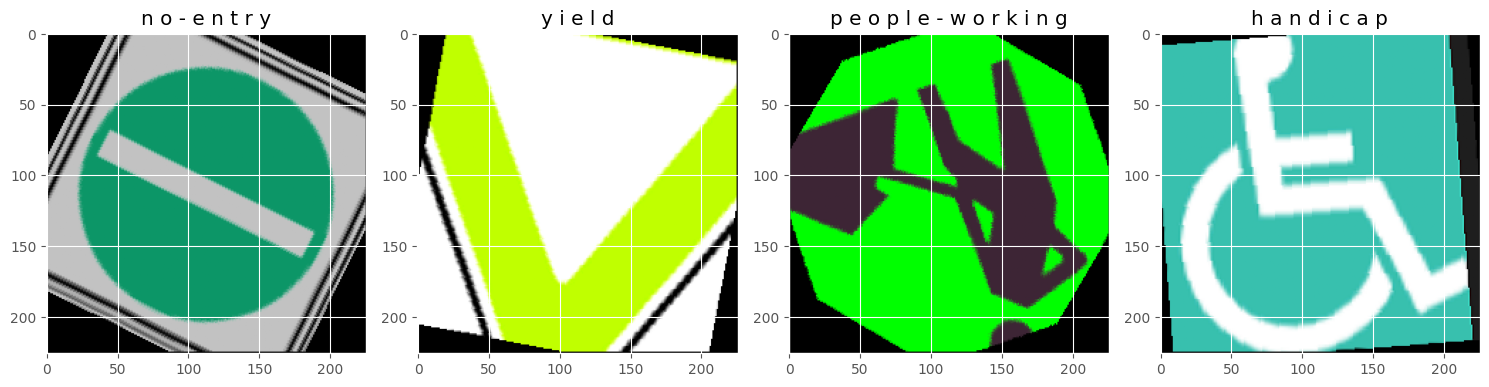

In [5]:
# Visualizing sample training dataset images after preprocessing
train_imshow(train, classes, batch_size=4)

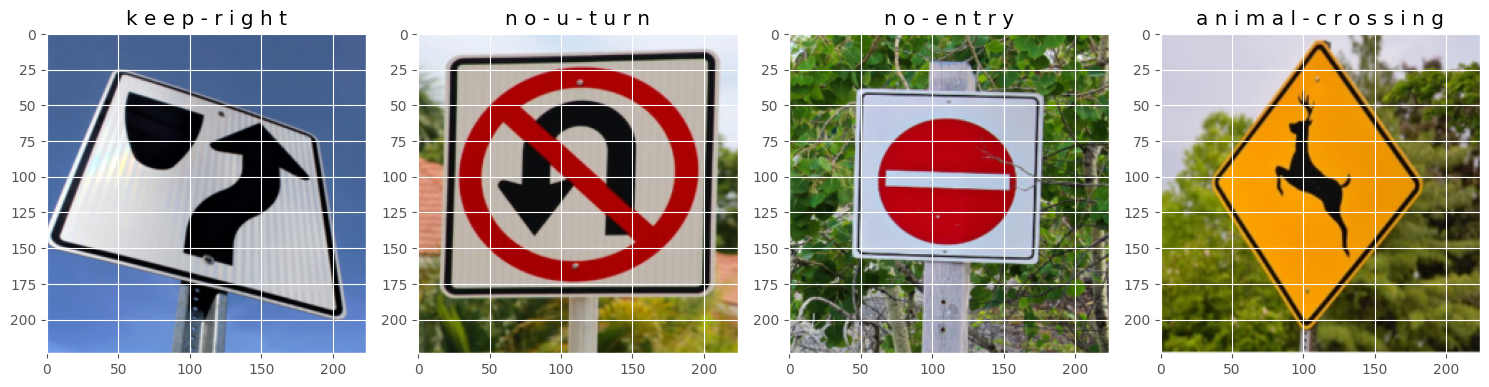

In [6]:
# Visualizing sample test dataset images after preprocessing
test_imshow(test, classes, batch_size=4)

In [7]:
# Depth and structure of the model

print(model)
summary(model.cuda(),(3, 160, 160))

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [8]:
# Train model or load previously trained model
train_new_model = True
model_state_dict_filename = '../output/model_temp.pth'

n_epochs=500

if train_new_model:
    # Train the model by specifying the number of epochs for iteration and the value of the learning rate.
    epoch_loss_train, epoch_acc_train, epoch_loss_test, epoch_acc_test = training_the_model(n_epoch=n_epochs, train=train, test=test)
else:
    # Load already trained model from directory
    model.load_state_dict(torch.load(model_state_dict_filename))

epoch: 0000 | training loss = 2.8485 | training accuracy = 11.8 | test loss = 2.8297 | test accuracy = 8.1 | learning rate = 0.0003
epoch: 0001 | training loss = 2.8305 | training accuracy = 17.6 | test loss = 2.8250 | test accuracy = 7.4 | learning rate = 0.0003
epoch: 0002 | training loss = 2.8284 | training accuracy = 11.8 | test loss = 2.8192 | test accuracy = 7.4 | learning rate = 0.0003
epoch: 0003 | training loss = 2.8107 | training accuracy = 17.6 | test loss = 2.8134 | test accuracy = 14.0 | learning rate = 0.0003
epoch: 0004 | training loss = 2.7992 | training accuracy = 35.3 | test loss = 2.8112 | test accuracy = 11.8 | learning rate = 0.0003
epoch: 0005 | training loss = 2.7763 | training accuracy = 23.5 | test loss = 2.8020 | test accuracy = 14.0 | learning rate = 0.0003
epoch: 0006 | training loss = 2.7914 | training accuracy = 23.5 | test loss = 2.7981 | test accuracy = 14.7 | learning rate = 0.0003
epoch: 0007 | training loss = 2.7786 | training accuracy = 23.5 | test l

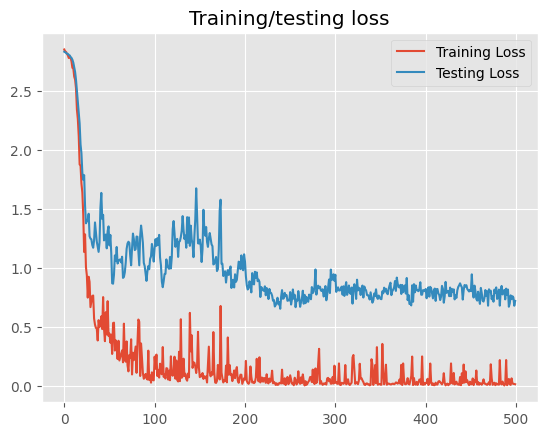

In [35]:
# Training/testing loss function plot. This function only works for training new model.

train_test_loss_function(n_epoch=n_epochs, epoch_loss_train=epoch_loss_train, epoch_loss_test=epoch_loss_test)

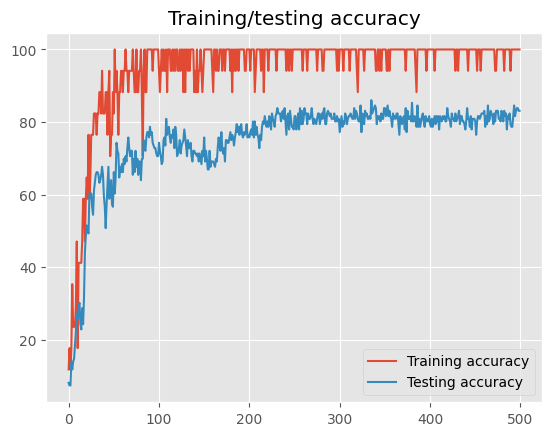

In [36]:
# Accuracy plot of model training. This function only works for training new model.

train_test_accuracy(n_epoch= n_epochs, epoch_acc_train=epoch_acc_train, epoch_acc_test=epoch_acc_test)

In [31]:
# Viewing the model results. This function only works for training new model.

correct_predictions, total, test_accuracy, test_loss, y, y_pred = model_predictions(test=test, model=model, criterion=criterion)
print(f'The total number of correct predictions by the model is: {correct_predictions}')
print(f'The total number of images is: {total}')
print(f'The test accuracy of the model is: {test_accuracy}')
print(f'The test loss of the model is: {test_loss}')

The total number of correct predictions by the model is: 117
The total number of images is: 136
The test accuracy of the model is: 86.02941176470588
The test loss of the model is: 0.712661456909058


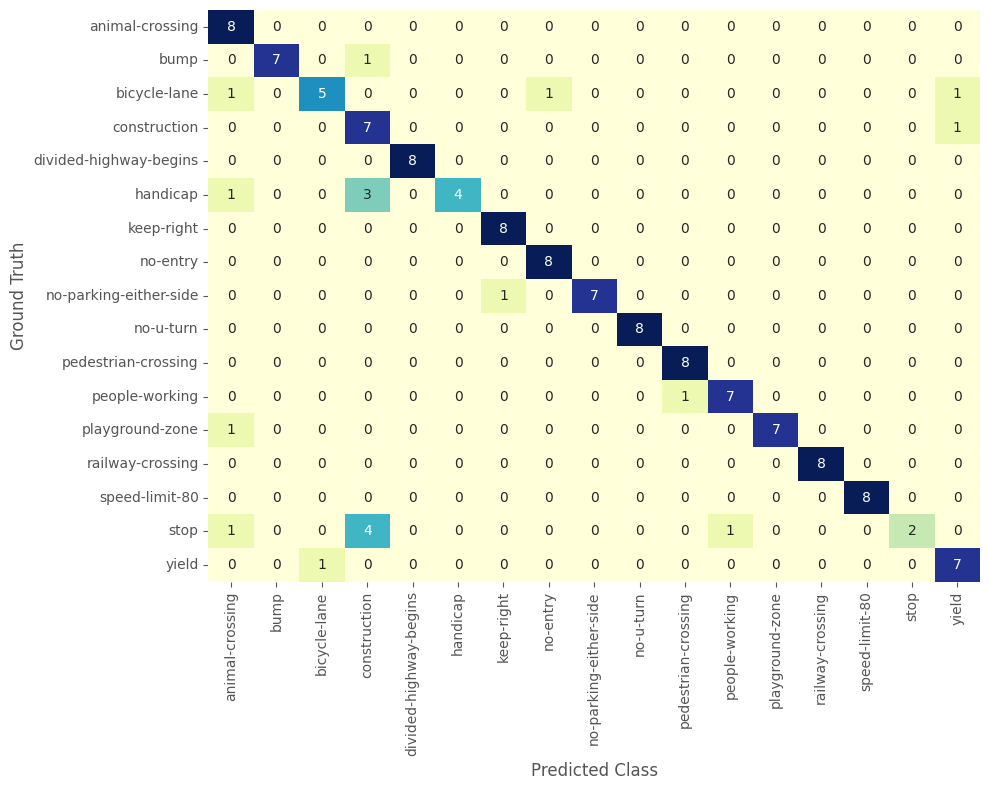

In [32]:
# Confusion matrix of model predictions. This function only works for training new model.

confusion_matrix_results(y=y, y_pred=y_pred, classes=classes)

In [33]:
# Classification report. This function only works for training new model.

print(model_classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.88      0.93         8
           2       0.83      0.62      0.71         8
           3       0.47      0.88      0.61         8
           4       1.00      1.00      1.00         8
           5       1.00      0.50      0.67         8
           6       0.89      1.00      0.94         8
           7       0.89      1.00      0.94         8
           8       1.00      0.88      0.93         8
           9       1.00      1.00      1.00         8
          10       0.89      1.00      0.94         8
          11       0.88      0.88      0.88         8
          12       1.00      0.88      0.93         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.25      0.40         8
          16       0.78      0.88      0.82         8

    accuracy              

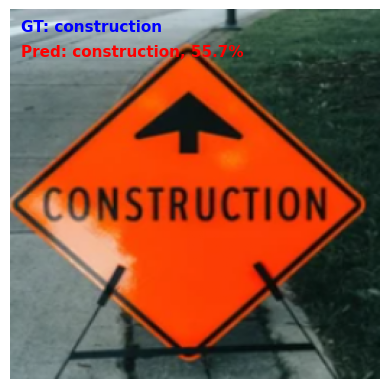

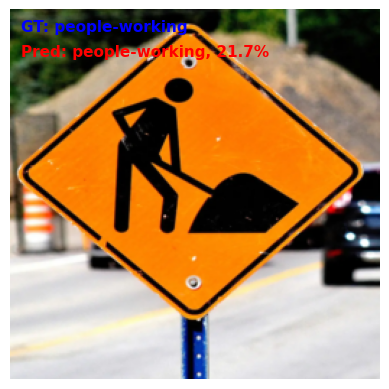

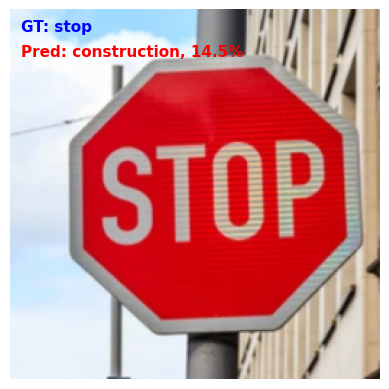

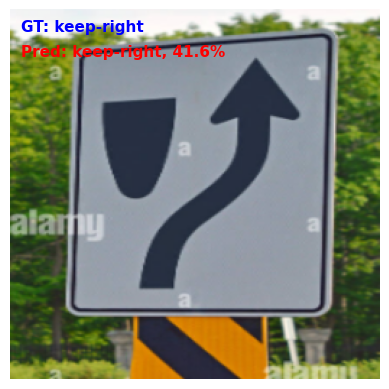

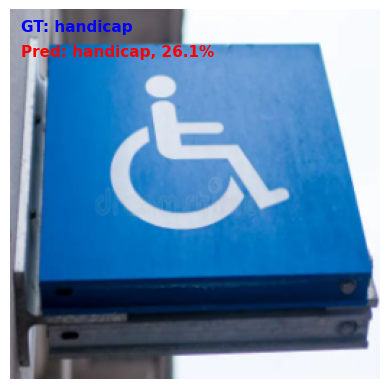

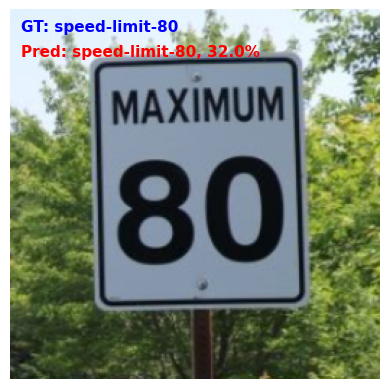

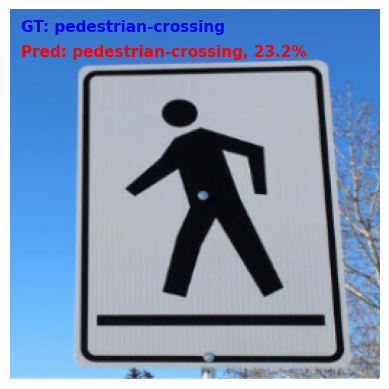

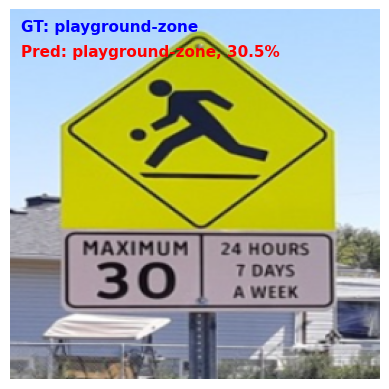

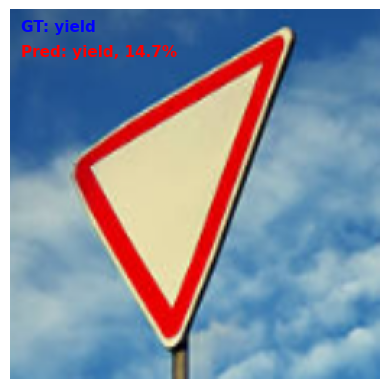

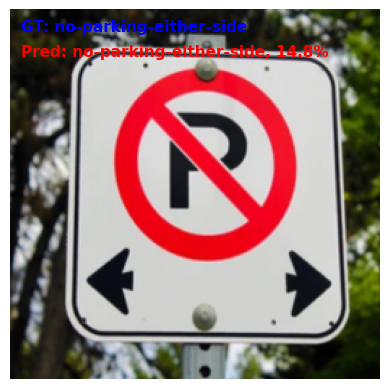

In [34]:
# Visualize some annotated predictions on the road signs dataset. This function works on both training new model and loading pretrained model.

# Get all the test image paths.
image_dir = '../data/test_set'

annotated_predictions(image_dir=image_dir, model=model, classes=classes)